# COP528 Coursework: Task 2

**Task Prompt:** You will be provided with an image dataset, where each image contains meaningful objects, e.g., parachute, oil box and truck etc. You could either use an existing CNN network architecture or design your own CNN network for classifying test images into the predefined classes.

## Model 2: The Modified LeNet Model

### Importing the data files:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the directory containing the images
data_dir = "F218134_Assignment\\imageset"
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

# Create a dataset of the images and labels
image_size = (128, 128)
batch_size = 32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size)

# Get the class names from the directory names
class_names = train_dataset.class_names
num_classes = len(class_names)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=image_size,
    batch_size=batch_size)

NotFoundError: Could not find directory F218134_Assignment\imageset\train

### Visualizing Training Data

['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 'n03417042', 'n03425413', 'n03445777', 'n03888257']


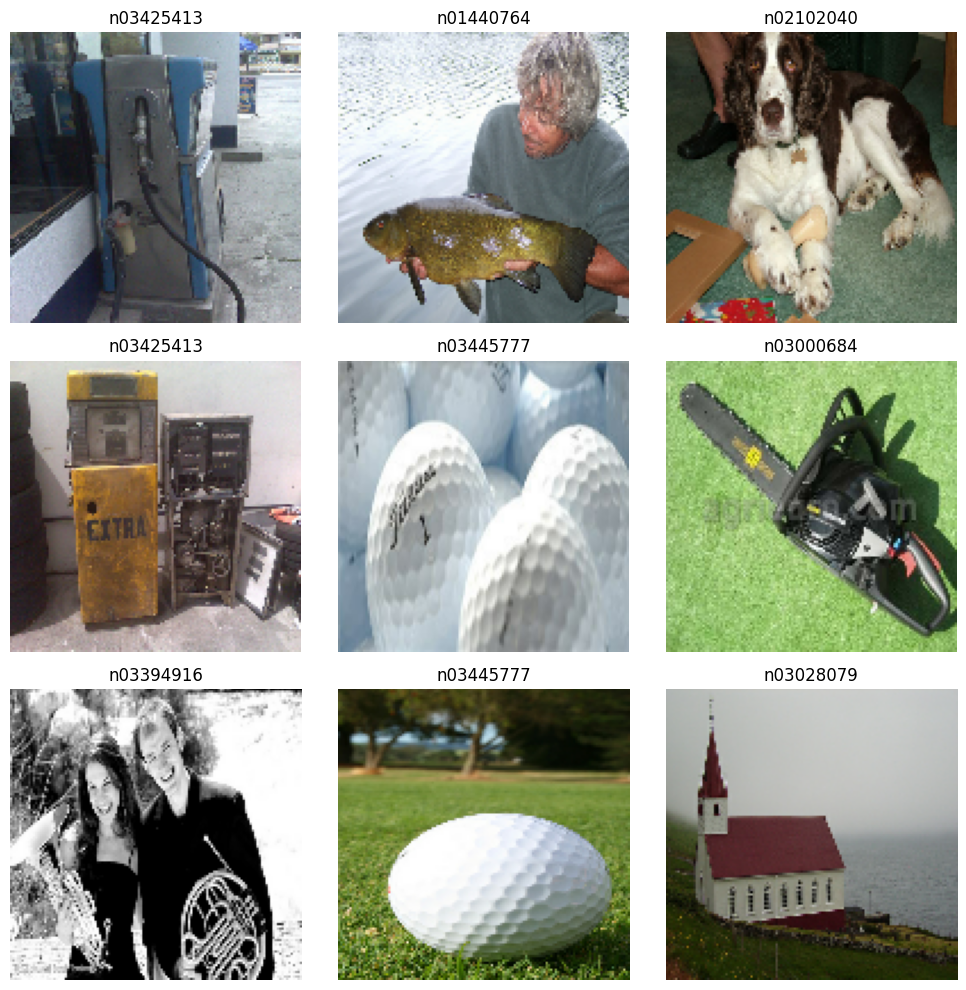

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

class_names = train_dataset.class_names
print(class_names)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i, (image, label) in enumerate(train_dataset.take(9)):
    image = image[0].numpy().astype("uint8")  # Selecting the first image from the batch
    label = label.numpy()[0]  # Selecting the first label from the batch
    axes[i].imshow(image)
    axes[i].set_title(class_names[label])
    axes[i].axis("off")

plt.tight_layout()
plt.show()

### Creating a Test dataset

In [3]:
# Create a new test dataset
val_batches = tf.data.experimental.cardinality(val_dataset)
test_dataset = val_dataset.take(val_batches // 5)
validation_dataset = val_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' %
      tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' %
      tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 99
Number of test batches: 24


### Working with the Model:

In [7]:
# Building the base model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Define the model
model = tf.keras.models.Sequential([
    # Normalise the image data by rescaling:
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),

    # Adding convolutional & pooling layers to the model:
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    # Adding dense (output) layers to the model:
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])


# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True), metrics=['accuracy'])

### Training & Summary of the Model

In [8]:
# Train the model
fitty_2 = model.fit(train_dataset, epochs=25, batch_size=batch_size,
                    validation_data=validation_dataset)

# Model summary:
model.summary()

# Evaluate test accuracy
test_loss, test_acc = model.evaluate(val_dataset, verbose=2)
print('Test Accuracy: ', test_acc)

Epoch 1/25
296/296 [==============================] - 14s 44ms/step - loss: 1.7305 - accuracy: 0.4049 - val_loss: 1.4504 - val_accuracy: 0.5166
Epoch 2/25
296/296 [==============================] - 9s 29ms/step - loss: 1.2120 - accuracy: 0.6012 - val_loss: 1.2820 - val_accuracy: 0.5740
Epoch 3/25
296/296 [==============================] - 7s 24ms/step - loss: 0.9979 - accuracy: 0.6746 - val_loss: 1.1043 - val_accuracy: 0.6427
Epoch 4/25
296/296 [==============================] - 7s 24ms/step - loss: 0.8207 - accuracy: 0.7336 - val_loss: 1.1958 - val_accuracy: 0.6278
Epoch 5/25
296/296 [==============================] - 7s 24ms/step - loss: 0.6616 - accuracy: 0.7879 - val_loss: 1.1620 - val_accuracy: 0.6506
Epoch 6/25
296/296 [==============================] - 7s 24ms/step - loss: 0.4958 - accuracy: 0.8378 - val_loss: 1.2674 - val_accuracy: 0.6541
Epoch 7/25
296/296 [==============================] - 7s 23ms/step - loss: 0.3688 - accuracy: 0.8773 - val_loss: 1.4443 - val_accuracy: 0.634

### Saving the Model

In [9]:
import pickle

model_location = "F218134_Assignment\\saved_models\\"

with open(model_location + 'modified_lenet_lrmod.pkl', 'wb') as file:
  pickle.dump(fitty_2.history, file)
    
model.save(model_location)

INFO:tensorflow:Assets written to: F218134_Assignment\saved_models\assets


INFO:tensorflow:Assets written to: F218134_Assignment\saved_models\assets


### Plotting the Performance

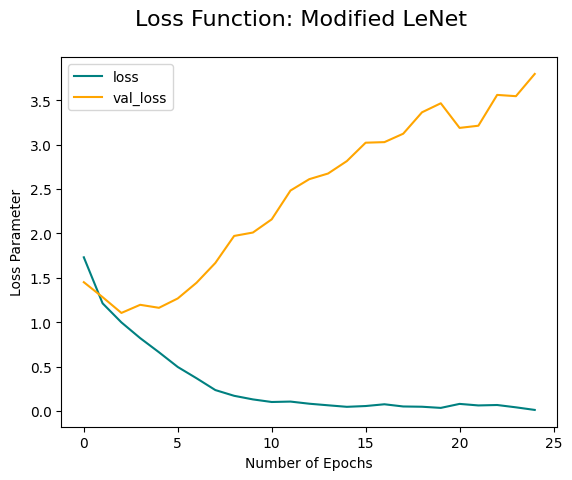

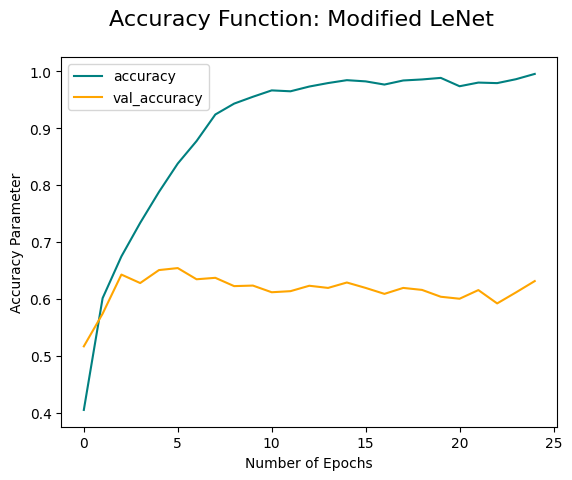

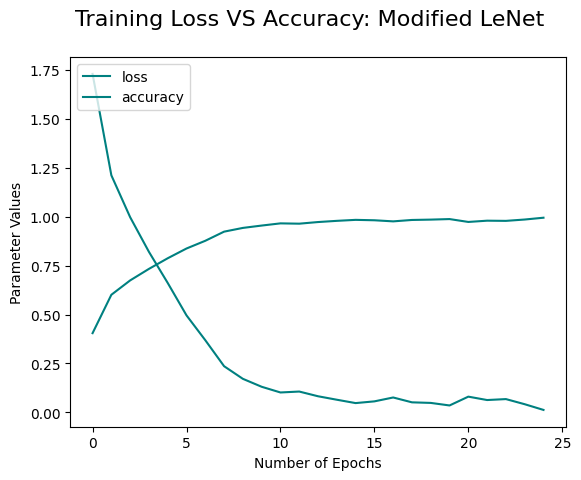

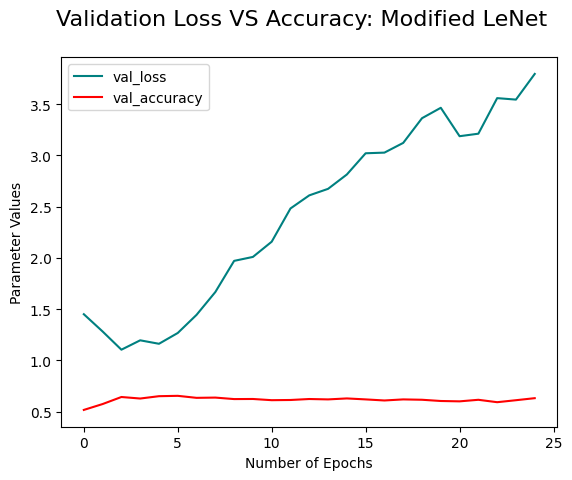

In [11]:
# Loss function:
fig = plt.figure()
plt.plot(fitty_2.history['loss'], color='teal', label='loss')
plt.plot(fitty_2.history['val_loss'], color='orange', label='val_loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Parameter")
fig.suptitle('Loss Function: Modified LeNet', fontsize=16)
plt.legend(loc="upper left")
plt.show()

# Accuracy function:
fig = plt.figure()
plt.plot(fitty_2.history['accuracy'], color='teal', label='accuracy')
plt.plot(fitty_2.history['val_accuracy'], color='orange', label='val_accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Parameter")
fig.suptitle('Accuracy Function: Modified LeNet', fontsize=16)
plt.legend(loc="upper left")
plt.show()

# Training Loss & Accuracy:
fig = plt.figure()
plt.plot(fitty_2.history['loss'], color='teal', label='loss')
plt.plot(fitty_2.history['accuracy'], color='teal', label='accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Parameter Values")
fig.suptitle('Training Loss VS Accuracy: Modified LeNet', fontsize=16)
plt.legend(loc="upper left")
plt.show()

# Validation Loss & Accuracy:
fig = plt.figure()
plt.plot(fitty_2.history['val_loss'], color='teal', label='val_loss')
plt.plot(fitty_2.history['val_accuracy'], color='red', label='val_accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Parameter Values")
fig.suptitle('Validation Loss VS Accuracy: Modified LeNet', fontsize=16)
plt.legend(loc="upper left")
plt.show()